# Cube and Data Warehouse mini Demo
This aims to implement a cube and do presentation
## Cube

In [1]:
pip install "atoti[jupyterlab]"

In [2]:
pip install psycopg2

In [ ]:
import psycopg2
from psycopg2 import OperationalError
# Connection details
db_name = "Data Warehousing"
db_user = "postgres"
db_password = "postgres"  
db_host = "localhost"  
db_port = "5432"


In [5]:
import atoti as tt
session = tt.Session()

Welcome to Atoti 0.8.11!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

Atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, you can request a trial license at https://www.atoti.io/evaluation-license-request.

You can hide this message by setting the `ATOTI_HIDE_EULA_MESSAGE` environment variable to True.


In [6]:
country_table = session.read_csv("/Users/syedumer/Downloads/ClientA/Country.csv", keys=["country_id"])
fact_table = session.read_csv("/Users/syedumer/Downloads/ClientA/Fact_table.csv", keys=["fact_id"])
population_table = session.read_csv("/Users/syedumer/Downloads/ClientA/Population.csv", keys=["population_id"])
year_table = session.read_csv("/Users/syedumer/Downloads/ClientA/Year.csv", keys=["year_id"])
host_table = session.read_csv("/Users/syedumer/Downloads/ClientA/host_countries.csv", keys=["game_slug"])


In [7]:
host_table

In [8]:
fact_table.join(country_table, fact_table["country_id"] == country_table["country_id"])

In [9]:
fact_table.join(population_table, fact_table["population_id"] == population_table["population_id"])

In [10]:
fact_table.join(year_table, fact_table["year_id"] == year_table["year_id"])

In [11]:
fact_table.join(host_table, fact_table["country_id"] == host_table["game_slug"])

In [12]:
cube = session.create_cube(fact_table)

In [13]:
cube

In [14]:
m= cube.measures
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x1338a6b40>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x1338da5d0>, 'Poverty ratio.MEAN': <atoti.measure.Measure object at 0x1338da630>, 'Poverty ratio.SUM': <atoti.measure.Measure object at 0x1338da660>, '% GDP Current health expenditure.MEAN': <atoti.measure.Measure object at 0x1338da690>, '% GDP Current health expenditure.SUM': <atoti.measure.Measure object at 0x1338da6c0>, '% annual GDP per capita growth.MEAN': <atoti.measure.Measure object at 0x1338da6f0>, '% annual GDP per capita growth.SUM': <atoti.measure.Measure object at 0x1338da720>, 'Population.MEAN': <atoti.measure.Measure object at 0x1338da750>, 'Population.SUM': <atoti.measure.Measure object at 0x1338da780>, 'Secure Internet servers.MEAN': <atoti.measure.Measure object at 0x1338da7b0>, 'Secure Internet servers.SUM': <atoti.measure.Measure object at 0x1338da7e0>, 'GDP per capita.MEAN': <atoti.measure.Measure object at 0x1338da810>, 'GDP per capita.SUM': <atoti.measure.Measure object at 0x1338da840>, 'Infant mortality rate.MEAN': <atoti.measure.Measure object at 0x1338da870>, 'Infant mortality rate.SUM': <atoti.measure.Measure object at 0x1338da8a0>, 'Private health expenditure per capita.MEAN': <atoti.measure.Measure object at 0x1338da8d0>, 'Private health expenditure per capita.SUM': <atoti.measure.Measure object at 0x1338da900>, 'External health expenditure per capita.MEAN': <atoti.measure.Measure object at 0x1338da930>, 'External health expenditure per capita.SUM': <atoti.measure.Measure object at 0x1338da960>, 'Government health expenditure per capita.MEAN': <atoti.measure.Measure object at 0x1338da990>, 'Government health expenditure per capita.SUM': <atoti.measure.Measure object at 0x1338da9c0>}

In [15]:
fact_table.head()

,year_id,country_id,population_id,Poverty ratio,GDP per capita,% annual GDP per capita growth,Secure Internet servers,Infant mortality rate,% GDP Current health expenditure,Government health expenditure per capita,Private health expenditure per capita,External health expenditure per capita,Population
fact_id,,,,,,,,,,,,,
f7,y36,C9,P7,1.1,8496.428157,-10.812611,3685.763129,6.8,9.984381,572.372952,288.862507,2.478937,45.388
f15,y36,C18,P16,0.0,16643.80658,-13.469456,1061.65811,11.4,7.200144,624.714657,565.637362,9.359943,0.288
f23,y36,C27,P24,0.0,5875.070606,-10.403317,243.480802,29.0,6.186646,270.98247,71.207316,20.544723,2.546
f31,y36,C36,P32,0.0,43349.67786,-6.088212,39881.2424,4.5,12.939675,4212.77856,1406.637295,0.0,37.977
f39,y36,C46,P41,2.3,12179.25667,-4.994102,1312.094911,6.7,7.855371,684.374309,267.414059,1.294202,5.128


In [16]:
cube.query(m["Infant mortality rate.MEAN"])

,Infant mortality rate.MEAN
0,20.26


In [17]:
hierarchies, levels, measures = cube.hierarchies, cube.levels, cube.measures

In [18]:
# original hierarchies
hierarchies

{('Fact_table', 'country_id'): <atoti.hierarchy.Hierarchy object at 0x1335b1760>, ('Country', 'country_name'): <atoti.hierarchy.Hierarchy object at 0x1335b37d0>, ('Population', 'country_population'): <atoti.hierarchy.Hierarchy object at 0x133027830>, ('Fact_table', 'year_id'): <atoti.hierarchy.Hierarchy object at 0x1338db830>, ('Fact_table', 'fact_id'): <atoti.hierarchy.Hierarchy object at 0x1338d8a10>, ('Year', 'game_season'): <atoti.hierarchy.Hierarchy object at 0x1338da960>, ('Host_countries', 'host_countries'): <atoti.hierarchy.Hierarchy object at 0x1338d9d30>, ('Country', 'region'): <atoti.hierarchy.Hierarchy object at 0x1338d9730>, ('Fact_table', 'population_id'): <atoti.hierarchy.Hierarchy object at 0x1338dabd0>, ('Host_countries', 'game_name'): <atoti.hierarchy.Hierarchy object at 0x1338daed0>}

In [19]:
# original levels
levels

In [20]:
measures

{'contributors.COUNT': <atoti.measure.Measure object at 0x133795c70>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x133a68e00>, 'Poverty ratio.MEAN': <atoti.measure.Measure object at 0x133a68e60>, 'Poverty ratio.SUM': <atoti.measure.Measure object at 0x133a68e90>, '% GDP Current health expenditure.MEAN': <atoti.measure.Measure object at 0x133a68ec0>, '% GDP Current health expenditure.SUM': <atoti.measure.Measure object at 0x133a68ef0>, '% annual GDP per capita growth.MEAN': <atoti.measure.Measure object at 0x133a68f20>, '% annual GDP per capita growth.SUM': <atoti.measure.Measure object at 0x133a68f50>, 'Population.MEAN': <atoti.measure.Measure object at 0x133a68f80>, 'Population.SUM': <atoti.measure.Measure object at 0x133a68fb0>, 'Secure Internet servers.MEAN': <atoti.measure.Measure object at 0x133a68fe0>, 'Secure Internet servers.SUM': <atoti.measure.Measure object at 0x133a69010>, 'GDP per capita.MEAN': <atoti.measure.Measure object at 0x133a69040>, 'GDP per capita.SUM': <atoti.measure.Measure object at 0x133a69070>, 'Infant mortality rate.MEAN': <atoti.measure.Measure object at 0x133a690a0>, 'Infant mortality rate.SUM': <atoti.measure.Measure object at 0x133a690d0>, 'Private health expenditure per capita.MEAN': <atoti.measure.Measure object at 0x133a69100>, 'Private health expenditure per capita.SUM': <atoti.measure.Measure object at 0x133a69130>, 'External health expenditure per capita.MEAN': <atoti.measure.Measure object at 0x133a69160>, 'External health expenditure per capita.SUM': <atoti.measure.Measure object at 0x133a69190>, 'Government health expenditure per capita.MEAN': <atoti.measure.Measure object at 0x133a691c0>, 'Government health expenditure per capita.SUM': <atoti.measure.Measure object at 0x133a691f0>}

In [21]:
hierarchies['Country'] = [levels["country_name"], levels["region"]]

In [22]:
hierarchies["Population"] = [levels["country_population"]]

In [23]:
hierarchies["Time"] = [levels['year_id'],levels[('game_season')]]

In [24]:
hierarchies["Host"] = [levels['host_countries'],levels[('game_name')]]

In [25]:
measures["Infant mortality rate.SUM in US"] = tt.filter(
    measures["Infant mortality rate.SUM"],
    levels[['Country','country_name', 'country_name']].isin(("United States")))

#### Query 1: Comparison B/w the infant mortality rate & Poverty ratio in Germany & USA

In [26]:
cube.query(measures["Infant mortality rate.SUM"],measures["Poverty ratio.SUM"],
           levels=[levels[('Country','country_name')]],
           filter=levels["Country", "country_name"].isin("United States", "Germany"), include_totals=True
          )

,Infant mortality rate.SUM,Poverty ratio.SUM
country_name,,
Total,8.50,.20
Germany,3.10,.00
United States,5.40,.20


Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
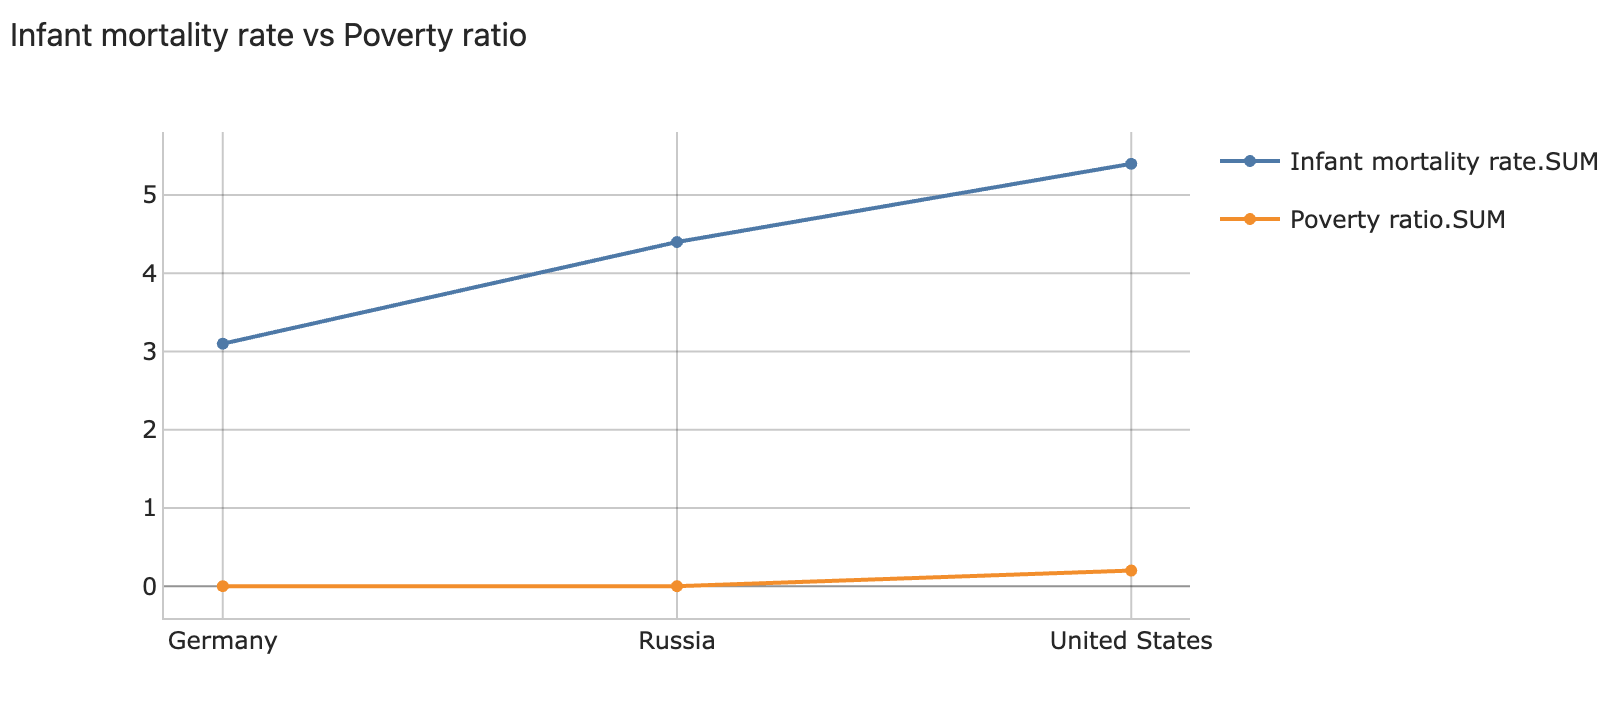

In [27]:
session.widget

#### Query 2: What's GDP per capita count in countries across Europe who participated in Olympics?

In [28]:
cube.query(measures["GDP per capita.SUM"],
           levels=[levels["Country", "region"]],
           filter=(
        (levels["Country", "region"] == "Europe")),
          )

,,GDP per capita.SUM
country_name,region,
Albania,Europe,"5,343.04"
Andorra,Europe,"37,207.22"
Austria,Europe,"48,809.23"
Belarus,Europe,"6,542.86"
Belgium,Europe,"45,517.90"
Bosnia and Herzegovina,Europe,"6,095.10"
Bulgaria,Europe,"10,153.48"
Croatia,Europe,"14,236.54"
Cyprus,Europe,"28,035.98"


Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
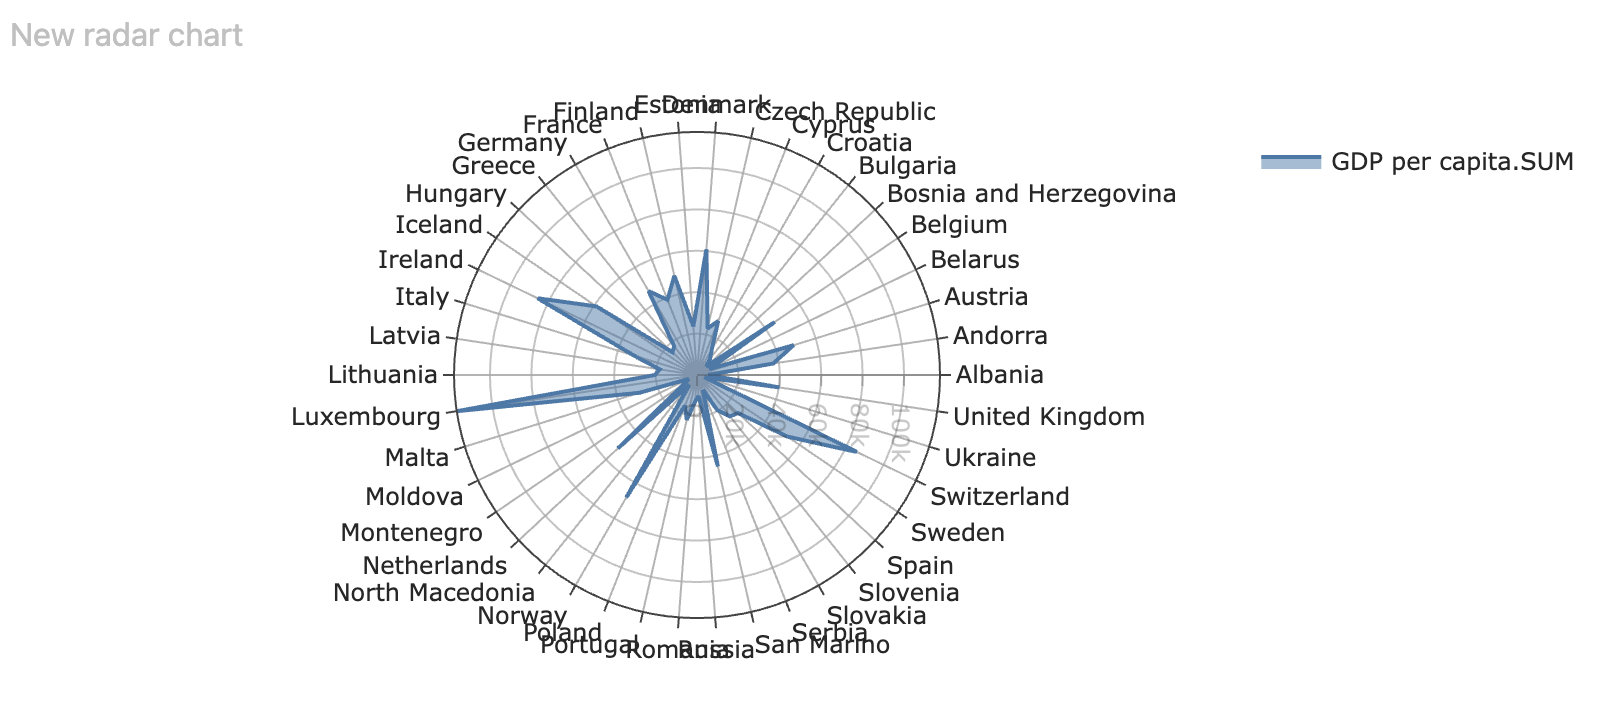

In [29]:
session.widget

#### Query 3: Identify the Total Expenses of Countries who participated in Olympics

In [30]:
sum1= tt.agg.sum(fact_table["Government health expenditure per capita"])
sum2= tt.agg.sum(fact_table["Private health expenditure per capita "])
sum3= tt.agg.sum(fact_table["External health expenditure per capita"])
sum4= tt.agg.sum(fact_table["% GDP Current health expenditure"])
measures["Sum of all expense"] = sum1 + sum2 + sum3 + sum4

In [31]:
cube.query(measures["Sum of all expense"], 
           levels=[levels["Country", "country_name"]])

,Sum of all expense
country_name,
Afghanistan,95.82
Albania,154.90
Algeria,221.17
Andorra,"3,345.97"
Angola,53.65
...,...
Venezuela,146.27
Vietnam,170.91
Yemen,.00


Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
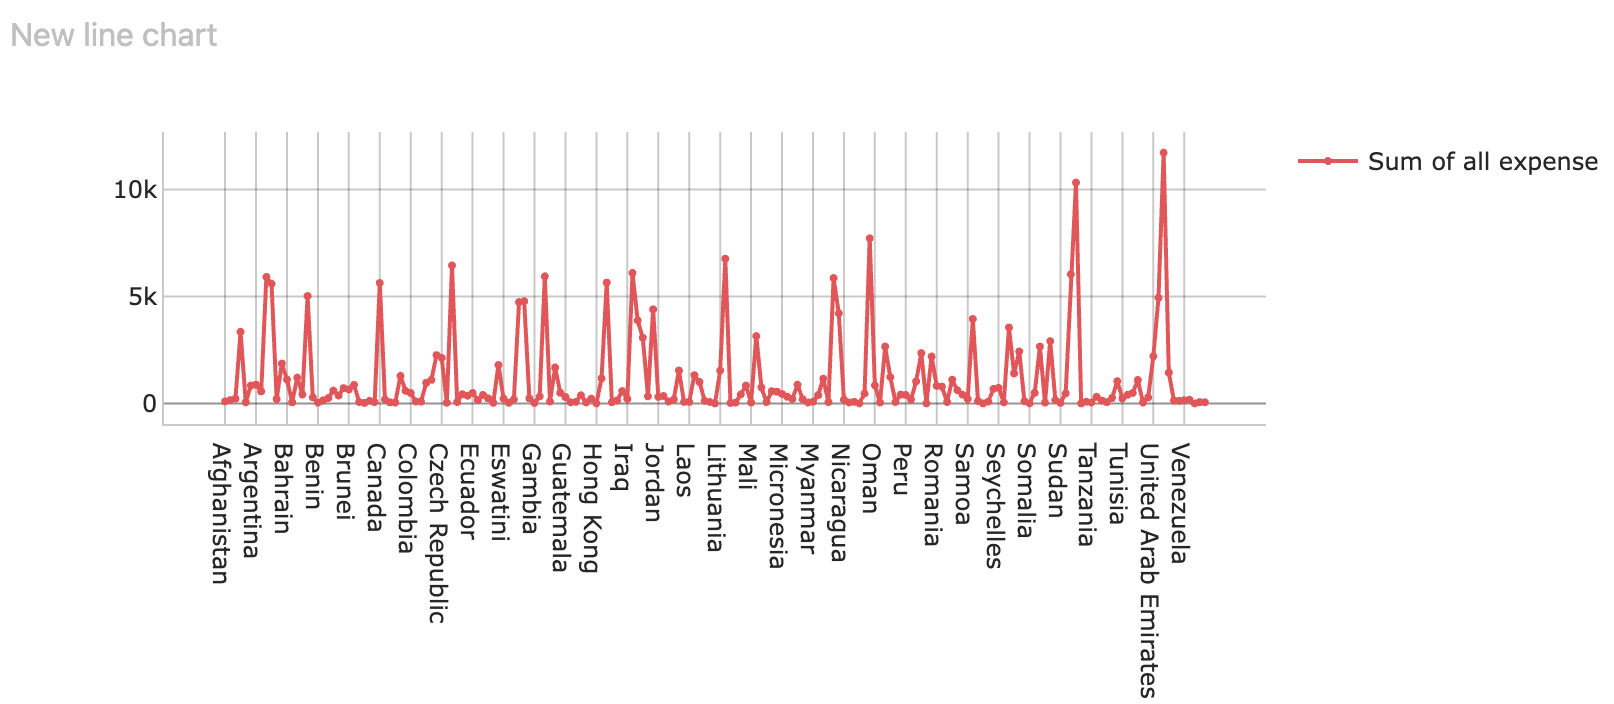

In [32]:
session.widget

#### Query 4: Calculating Difference in GDP per capita & total Expenses

In [33]:
sum1= tt.agg.sum(fact_table["Government health expenditure per capita"])
sum2= tt.agg.sum(fact_table["Private health expenditure per capita "])
sum3= tt.agg.sum(fact_table["External health expenditure per capita"])
sum4= tt.agg.sum(fact_table["% GDP Current health expenditure"])
measures["Sum of all expense"] = sum1 + sum2 + sum3 + sum4

In [34]:
measures['Max Poverty ratio'] = tt.agg.max(fact_table["Poverty ratio"])
measures['Max GDP per capita'] = tt.agg.max(fact_table["GDP per capita"])

m["Difference in Expense vs GDP"]=measures["Sum of all expense"] - measures['Max GDP per capita']


In [35]:
cube.query(m["Difference in Expense vs GDP"], 
           levels=[levels[('Country', 'country_name')]])

,Difference in Expense vs GDP
country_name,
Afghanistan,-421.05
Albania,"-5,188.14"
Algeria,"-3,132.98"
Andorra,"-33,861.25"
Angola,"-1,449.30"
...,...
Venezuela,146.27
Vietnam,"-3,415.43"
Yemen,-583.88


Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
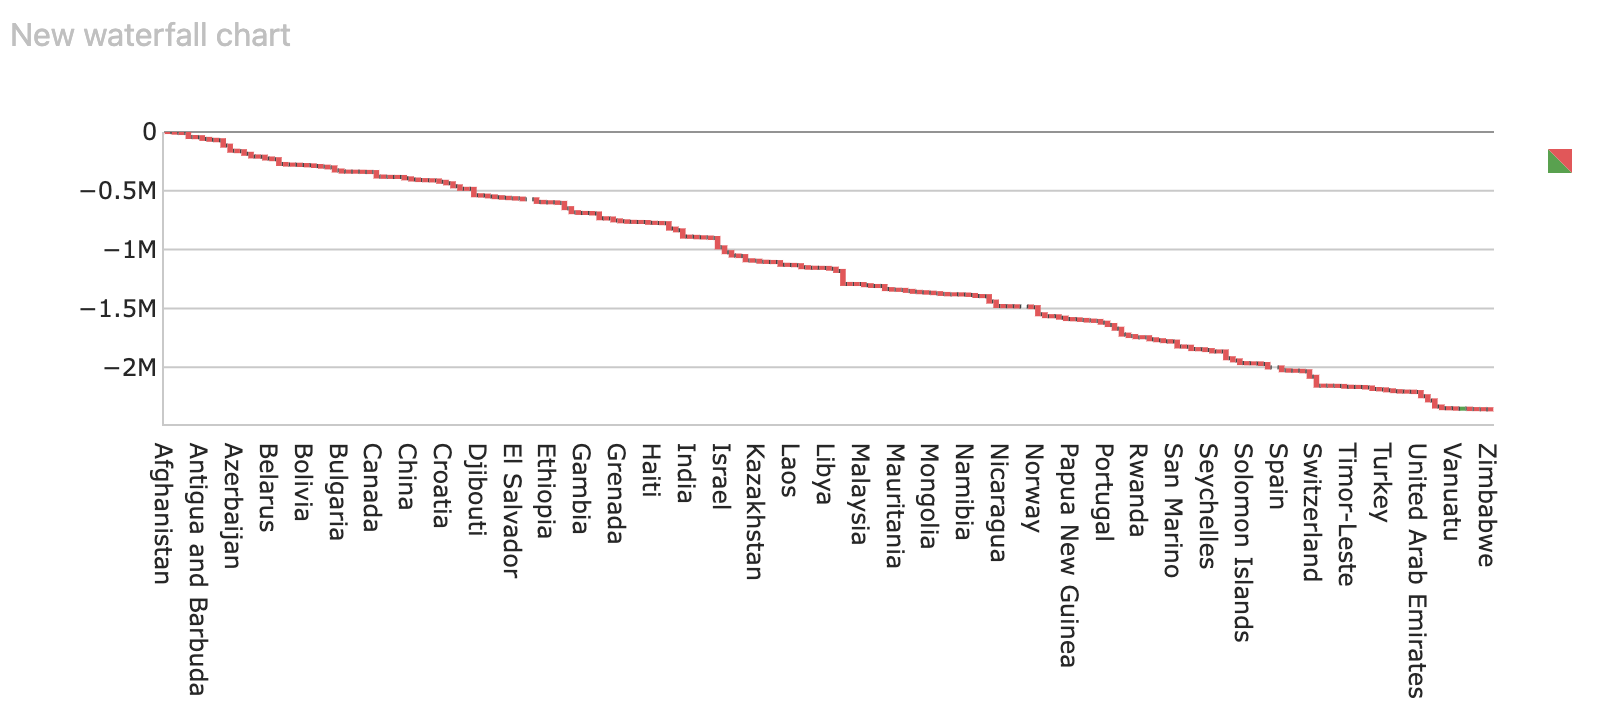

In [36]:
session.widget

#### Query 4: Calculating Difference in %GDP on Expense & %GDP per Capita Growth in Asian Countries

In [37]:
sum1= tt.agg.sum(fact_table["% GDP Current health expenditure"])
sum2= tt.agg.sum(fact_table["% annual GDP per capita growth"])

In [38]:
measures["Difference in %GDP on Expense & %GDP per Capita Growth"]= sum1 - sum2

In [39]:
cube.query(measures["% GDP Current health expenditure.SUM"], measures["% annual GDP per capita growth.SUM"],measures["Difference in %GDP on Expense & %GDP per Capita Growth"],
           levels=[levels["Country", "region"]],
           filter=(
        (levels["Country", "region"] == "Asia")),
          )


,,% GDP Current health expenditure.SUM,% annual GDP per capita growth.SUM,Difference in %GDP on Expense & %GDP per Capita Growth
country_name,region,,,
Afghanistan,Asia,15.53,-5.36,20.90
Armenia,Asia,12.24,-6.70,18.95
Azerbaijan,Asia,4.61,-4.95,9.56
Bahrain,Asia,4.72,-3.57,8.29
Bangladesh,Asia,2.63,2.27,.36
Bhutan,Asia,4.37,-10.60,14.97
Brunei,Asia,2.39,.29,2.10
Cambodia,Asia,7.51,-4.21,11.72
China,Asia,5.59,2.00,3.60


Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
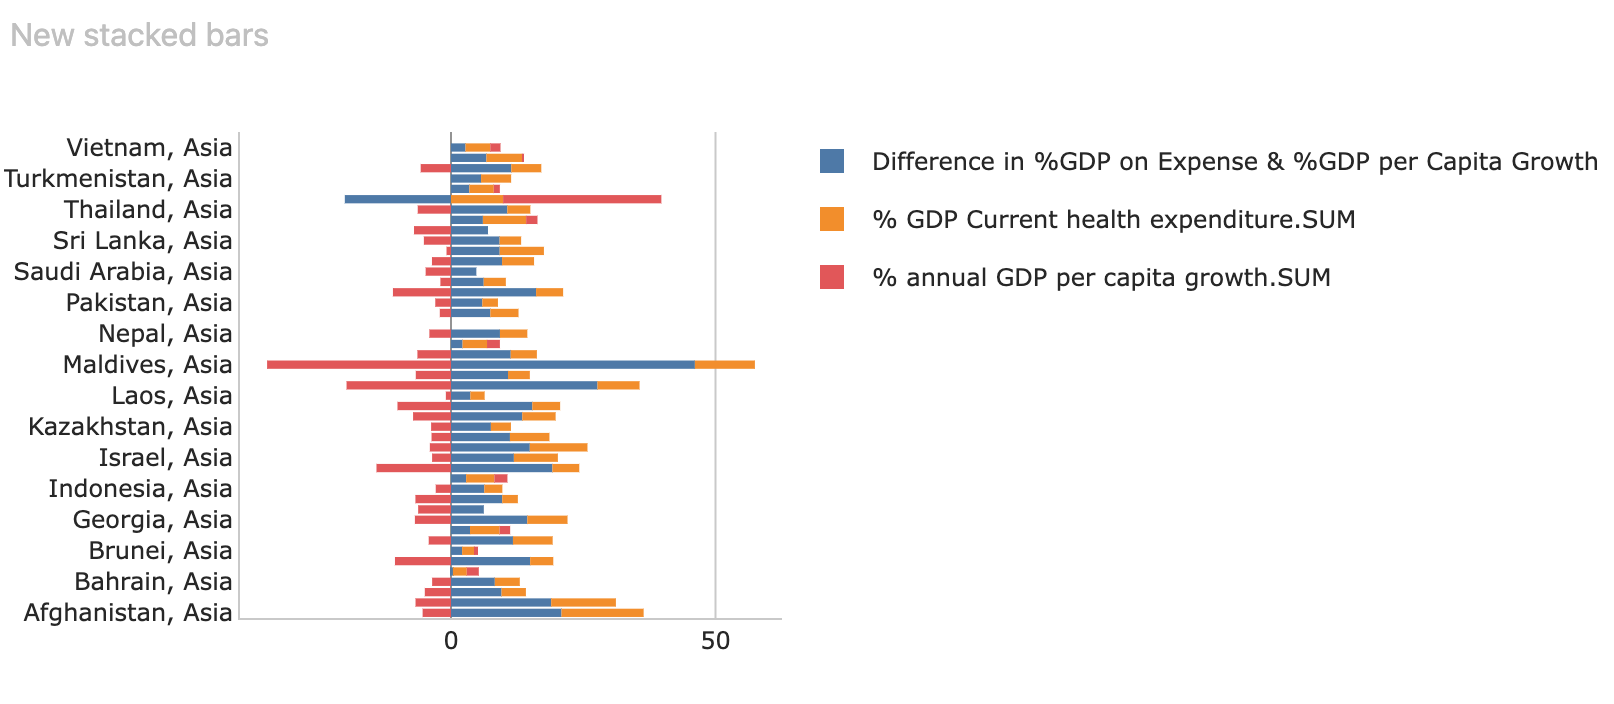

In [40]:
session.widget

## Presentation

In [41]:
session.link

http://localhost:60465

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.